## **M.Sc. Biomedical Genomics; Intro to Programming 10/2020**

#### Gavin Farrell 

### ****Python Script Description:****
Provide a text file with GenBank accession codes to the script and it will analyse the genomes of the organisms in rgeards to gene lengths relative to GC bases distribution

('Genbank accession IDs read in from file:', ['JN258408', 'JF801956', 'NC_014649', 'JN036606', 'NC_014637', 'U00096']) 

Data for Genbank accession ID: JN258408  successfully parsed and stored for use
Data for Genbank accession ID: JF801956  successfully parsed and stored for use
Data for Genbank accession ID: NC_014649  successfully parsed and stored for use
Data for Genbank accession ID: JN036606  successfully parsed and stored for use
Data for Genbank accession ID: NC_014637  successfully parsed and stored for use
Data for Genbank accession ID: U00096  successfully parsed and stored for use

Hang in there, results incoming...
Expected wait approx 2-3 minutes


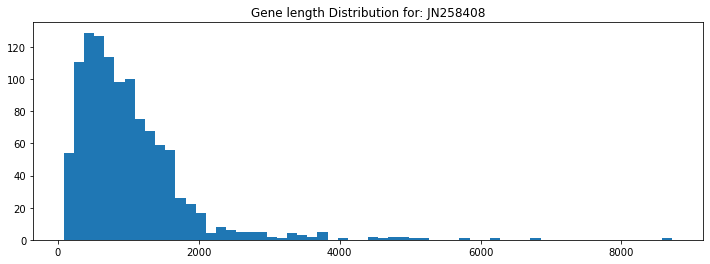

Mean gene length distribution: 1015.0633928571428
Min gene length distribution: 87
Max gene length distribution: 8724




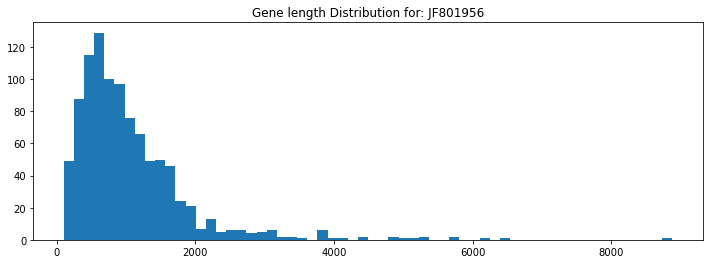

Mean gene length distribution: 1055.9423076923076
Min gene length distribution: 102
Max gene length distribution: 8880




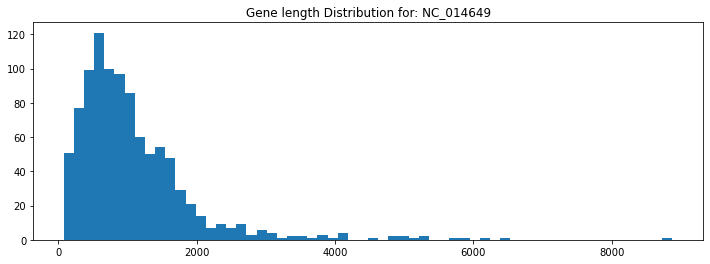

Mean gene length distribution: 1073.0347293156283
Min gene length distribution: 78
Max gene length distribution: 8880




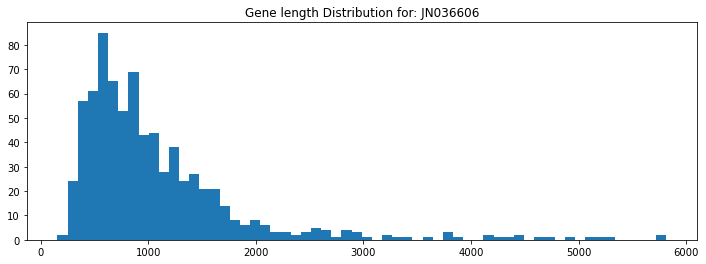

Mean gene length distribution: 1068.4722222222222
Min gene length distribution: 156
Max gene length distribution: 5814




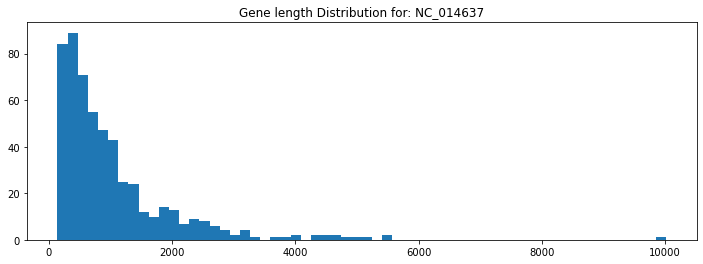

Mean gene length distribution: 1023.0165441176471
Min gene length distribution: 144
Max gene length distribution: 10014




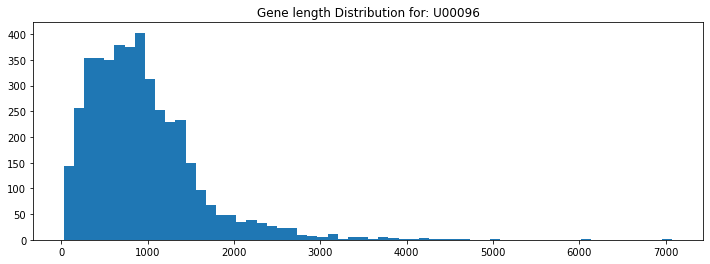

Mean gene length distribution: 934.2991631799163
Min gene length distribution: 27
Max gene length distribution: 7077


------------------------------------------------------------------------


Quantile boundaries for :JN258408
10%: 308.7
90%: 1746.9


Quantile boundaries for :JF801956
10%: 326.1
90%: 1857.6000000000008


Quantile boundaries for :NC_014649
10%: 315.0
90%: 1899.6000000000001


Quantile boundaries for :JN036606
10%: 429.0
90%: 1804.5


Quantile boundaries for :NC_014637
10%: 240.0
90%: 2167.2


Quantile boundaries for :U00096
10%: 276.0
90%: 1659.0


------------------------------------------------------------------------


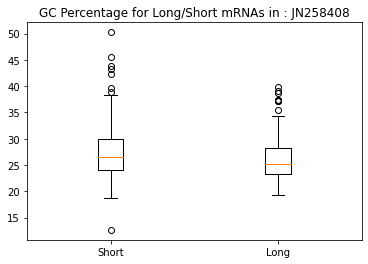

Mean (GC%) in long seqs 26.408997312464212
Variance (GC%) in long seqs 20.007559518523994


Mean (GC%) in short seqs 27.853878583900975
Variance (GC%) in short seqs 38.50740078550979

T­test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  0.054145272455257944






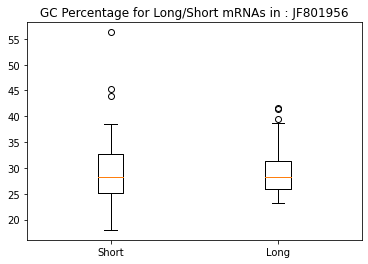

Mean (GC%) in long seqs 29.182835192184864
Variance (GC%) in long seqs 16.659152947515356


Mean (GC%) in short seqs 29.36584012897519
Variance (GC%) in short seqs 40.693878973784116

T­test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  0.8374198994337712






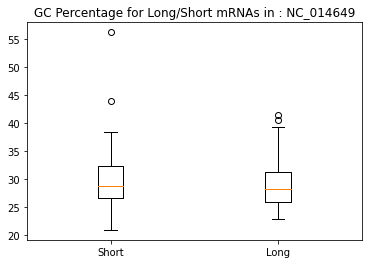

Mean (GC%) in long seqs 29.08633643587314
Variance (GC%) in long seqs 17.331110949475317


Mean (GC%) in short seqs 29.647895897951575
Variance (GC%) in short seqs 27.920005625896096

T­test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  0.4311167658626518






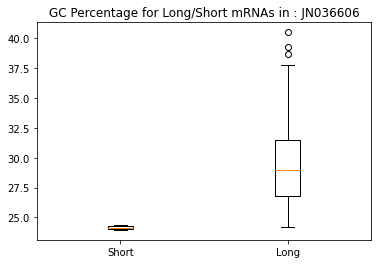

Mean (GC%) in long seqs 29.726349131676386
Variance (GC%) in long seqs 12.665487462397598


Mean (GC%) in short seqs 24.158653846153847
Variance (GC%) in short seqs 0.04012830785667322

T­test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  1.8741231654113442e-10






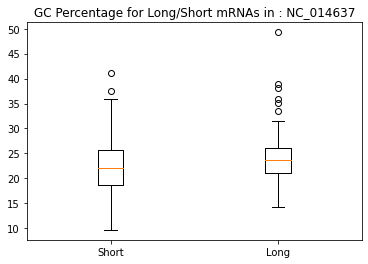

Mean (GC%) in long seqs 24.248305989281317
Variance (GC%) in long seqs 28.051513013227186


Mean (GC%) in short seqs 22.905358885708768
Variance (GC%) in short seqs 35.035122640711286

T­test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  0.13677639170159106






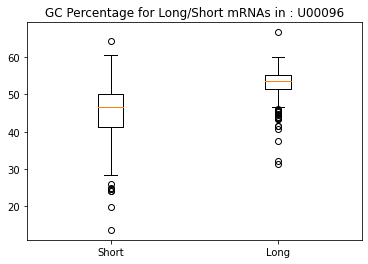

Mean (GC%) in long seqs 53.08692811229205
Variance (GC%) in long seqs 12.266287646979157


Mean (GC%) in short seqs 45.278034762679084
Variance (GC%) in short seqs 53.16842618519097

T­test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  6.055840531000496e-69






In [10]:
#Defines a function that will analyse genebank organisms and interpret gene lengths and GC distribution
def analyse_genbank_gc(accession):
    #Imports needed libraries
    from Bio.Seq import Seq
    from Bio.SeqRecord import SeqRecord
    from Bio import Entrez
    from Bio import SeqIO
    from Bio.SeqUtils import GC
    import numpy as np
    import matplotlib.pyplot as plt
    

    #reads in file cotaining genbank organism accession IDs
    with open(accession,'r') as genbank_accessions:
        accession_string = genbank_accessions.read()
        pass
    
    #processes each genbank accession ID into a usable list
    x = accession_string.strip()
    accession_list = x.split('\n')
    print(('Genbank accession IDs read in from file:',accession_list),'\n') 
    
    #Feeds in accession list and extracts genbank data 
    #Data for each accession is then parsed and stored in a list 'gene_list'
    gene_list = []
    for accession_code in accession_list:
        try:
            Entrez.email = "gmanfarrell@gmail.com" 
            handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id=accession_code)
            test = SeqIO.parse(handle,"gb")
            gene_list.append(test)
            print('Data for Genbank accession ID:',accession_code,' successfully parsed and stored for use')
        
        #Prints an error if data unobtainable 
        except:
            print('Failed to fetch record.')
            
    #Prepares users for wait time
    print('\nHang in there, results incoming...')
    print('Expected wait approx 2-3 minutes')
    
    #For each genbank organism stored in 'gene_list':
    #1. obtains cds lengths for each genbank organism and stores it in 'list_of_list'   
    #2. obtains cds sequence for each genbank organism and stores it in 'cds_mega'
    list_of_list = []
    cds_mega =[]
    for gene in gene_list:
        cds_list = []
        cds_seqs =[]
        for rec in gene:
               for feature in rec.features:
                    if feature.type == "CDS":
                        gene_cds = (feature.location.extract(rec).seq)
                        cds_list.append(len(gene_cds))
                        cds_seqs.append(gene_cds)
        list_of_list.append(cds_list)
        cds_mega.append(cds_seqs)
    
    #For each organism it creates a gene length distrbtuion histogram and calculates max, min, mean of the lengths
    for gene, accession in zip(list_of_list,accession_list):
        fig, axes = plt.subplots(figsize=(12,4))
        axes.hist(gene, bins=60)
        axes.set_title('Gene length Distribution for: ' +str(accession))
        plt.show()
        print('Mean gene length distribution:',np.mean(gene))
        print('Min gene length distribution:',np.min(gene))
        print('Max gene length distribution:',np.max(gene))
        print('\n')
        
    print('------------------------------------------------------------------------')
    print('\n')
    
    #For each organism it takes their cds lengths and sets boundaries at bottom 10% and top 90% of the lengths 
    for gene, accession in zip(list_of_list,accession_list):
        print('Quantile boundaries for :' +str(accession))
        print("10%:",np.quantile(gene, .10))
        print("90%:",np.quantile(gene, .90))
        print('\n')
    
    #For each organism it isolates the top 90% of cds' LENGTHS based on quantile boundaries
    #Isolated sequences stored in 'all_long_seqs'
    all_long_seqs = []
    for gene in list_of_list:
        long_seqs = []
        for length in gene:
            x = np.quantile(gene, .90)
            if length > x:
                long_seqs.append(length)
        all_long_seqs.append(long_seqs)
     
    #For each organism it isolates the bottom 10% of cds' LENGTHS based on quantile boundaries
    #Isolated sequences stored in 'all_short_seqs'
    all_short_seqs =[]
    for gene in list_of_list:
        short_seqs = []
        for length in gene:
                y = np.quantile(gene, .10)
                if length < y:
                    short_seqs.append(length)
        all_short_seqs.append(short_seqs)


    #For each organism it isolates the top 90% of cds' SEQUENCES based on quantile boundaries
    #Isolated sequences stored in 'all_long_seqs_cds'
    all_long_seqs_cds = []
    for gene in cds_mega:
        long_seqs_cds = []
        for cds in gene:
            if len(cds) > x:
                long_seqs_cds.append(cds)
        all_long_seqs_cds.append(long_seqs_cds)

    #For each organism it isolates the bottom 10% of cds' SEQUENCES based on quantile boundaries
    #Isolated sequences stored in 'all_short_seqs_cds'
    all_short_seqs_cds =[]
    for gene in cds_mega:
        short_seqs_cds = []
        for cds in gene:
              if len(cds) < y:
                    short_seqs_cds.append(cds)
        all_short_seqs_cds.append(short_seqs_cds) 
    
    #For each organism it creates a list of the GC percentages in each of the top 90% cds sequences in 'all_long_seqs_cds'
    all_long_seq_gc = []
    for gene in all_long_seqs_cds:
        long_seq_gc = []
        for cds in gene:
            long_seq_gc.append(GC(cds))
        all_long_seq_gc.append(long_seq_gc)  
    
    #For each organism it creates a list of the GC percentages in each of the bottom 10% cds sequences in 'all_short_seqs_cds'
    all_short_seq_gc = []
    for gene in all_short_seqs_cds:
        short_seq_gc = []
        for cds in gene:
            short_seq_gc.append(GC(cds))
        all_short_seq_gc.append(short_seq_gc) 
    
    print('------------------------------------------------------------------------')
    
    #For each organism it plots boxplots of the distrbutions of GC percentage of their cds' 
    for gc_long, gc_short,accession in zip(all_long_seq_gc, all_short_seq_gc,accession_list):   
            data = [gc_short, gc_long]
            data_names = ['Short','Long']
            fig1, ax1 = plt.subplots()
            ax1.set_title('GC Percentage for Long/Short mRNAs in : '+ str(accession))
            ax1.boxplot(data)
            ax1.set_xticklabels(data_names, fontsize=10)
            plt.show()
              
            #For each organism it calculates the mean and variance of the totl long and short sequences
            print('Mean (GC%) in long seqs',np.mean(gc_long)) 
            print('Variance (GC%) in long seqs',np.var(gc_long))
            print('\n')
            print('Mean (GC%) in short seqs',np.mean(gc_short))
            print('Variance (GC%) in short seqs',np.var(gc_short))
            
            #For each organism it calculates a p value to determine significant statistical differences in GC content 
            #between short and long cds sequences using a t-test
            from scipy import stats
            tst = stats.ttest_ind(gc_short,gc_long, equal_var=False)
            print ('\nT­test to determine if long & short GC% are drawn from the same distribution')
            print ('Note: unequal variances')
            print ('pvalue: ',tst.pvalue)
            print('\n')
            print('\n')

#Use the function on a data file contining Genbank Accesion IDs
analyse_genbank_gc('genbank_accessions.txt')

#Optional allow user to run and enter file by name
#input_file = input('Please enter file name from local directory containing Genbank accession IDs')
#analyse_genbank_gc(input_file)

## **Short commentary on results**

**1. Assessing the gene length distribtuions (mean/max/min):**
<br>
All were very similar across the 3 fields
<br>
**Of note:**
<br>
-The smallest cds was in specimen 6: accession = U00096 at 27bp (standard min cds length ~100bp)
<br>
-The largest max cds was in specimen 5:  accession = NC_014637 at 10,014bp (standard max cds length ~8,800bp)
<br>
-The smallest max cds was in specimen 4: accession JN06606 at 5,814bp (standard max cds length ~8,800bp)
<br>
<br>
**2. Assessing quantile cut offs**
<br>
Nothing of note or signifance at a glance between all 6 organisms. 
<br>All averaged around similar values.
<br>
<br>
**3. Assessing p-values of GC percentages in long vs short reads** 
<br>
Organisms 1,2,3 and 5 had insignifcant p-values at a cut off of 0.05
<br>
This indicates no signifanct difference in GC percentage composition between long and short cds'
<br>
**Of note:**<br>
Organism 4, JN06606 = small cds GC%(24%) was ~5% lower than long cds GC%(29%)
<br>
Organism 6, U00096 = small cds GC%(45%) was ~8% lower than long cds GC%(53%)